In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import roc_tools as rtp
import pylab as plt
import numpy


lens:  25 25


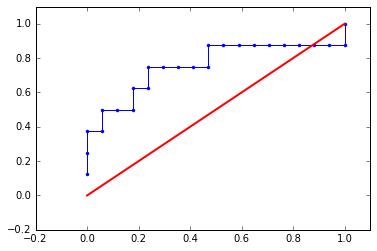

In [5]:
aa=rtp.roc_test_spp1()

[[0.0, 0.0], [0.0, 0.125], [0.0, 0.25], [0.0, 0.375], [0.058823529411764705, 0.375], [0.058823529411764705, 0.5], [0.11764705882352941, 0.5], [0.17647058823529413, 0.5], [0.17647058823529413, 0.625], [0.23529411764705882, 0.625], [0.23529411764705882, 0.75], [0.29411764705882354, 0.75], [0.35294117647058826, 0.75], [0.4117647058823529, 0.75], [0.47058823529411764, 0.75], [0.47058823529411764, 0.875], [0.5294117647058824, 0.875], [0.5882352941176471, 0.875], [0.6470588235294118, 0.875], [0.7058823529411765, 0.875], [0.7647058823529411, 0.875], [0.8235294117647058, 0.875], [0.8823529411764706, 0.875], [0.9411764705882353, 0.875], [1.0, 0.875], [1.0, 1.0]]
lens:  25 8


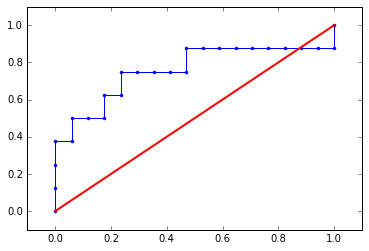

In [6]:
Z_fc = rtp.default_roc_sample['Z_fc']
Z_ev = rtp.default_roc_sample['Z_ev']
#
FH = rtp.calc_roc(Z_fc, Z_ev, f_denom=None, h_denom=None)
print(FH)
plt.figure()
plt.clf()
ax=plt.gca()
ax.plot(*zip(*FH), ls='-', marker='.')
ax.plot(range(2), range(2), color='r', ls='-', lw=2.)
#
ax.set_xlim(-.1, 1.1*max([x[0] for x in FH]))
ax.set_ylim(-.1, 1.1*max([x[1] for x in FH]))

print('lens: ', len(Z_fc), len(Z_ev))

[[0.0, 0.0], [0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [1.0, 3.0], [1.0, 4.0], [2.0, 4.0], [3.0, 4.0], [3.0, 5.0], [4.0, 5.0], [4.0, 6.0], [5.0, 6.0], [6.0, 6.0], [7.0, 6.0], [8.0, 6.0], [8.0, 7.0], [9.0, 7.0], [10.0, 7.0], [11.0, 7.0], [12.0, 7.0], [13.0, 7.0], [14.0, 7.0], [15.0, 7.0], [16.0, 7.0], [17.0, 7.0], [17.0, 8.0]]
lens:  25 8


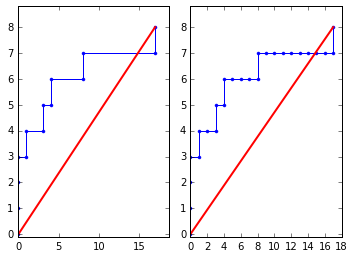

In [7]:
Z_fc = rtp.default_roc_sample['Z_fc']
Z_ev = rtp.default_roc_sample['Z_ev']
#
# apparently, this needs to be revisited; there is an error in the compression
# logic for cases real data sets that the sample data don't hit.
FH0 = rtp.calc_roc_compressed(Z_fc, Z_ev, f_denom=1, h_denom=1, do_compressed=True)
FH = rtp.calc_roc(Z_fc, Z_ev, f_denom=1, h_denom=1)

print(FH)
fg=plt.figure()
plt.clf()
#ax1=plt.gca()

ax1 = fg.add_axes([.1,.1, .35,.8])
ax2 = fg.add_axes([.5, .1, .35,.8], sharey=ax1)

ax1.plot(*zip(*FH0), ls='-', marker='.')
ax1.plot(numpy.arange(2)*FH0[-1][0], numpy.arange(2)*FH0[-1][1], color='r', ls='-', lw=2.)

ax2.plot(*zip(*FH), ls='-', marker='.')
ax2.plot(numpy.arange(2)*FH[-1][0], numpy.arange(2)*FH[-1][1], color='r', ls='-', lw=2.)
#
ax1.set_xlim(-.1, 1.1*max([x[0] for x in FH]))
ax1.set_ylim(-.1, 1.1*max([x[1] for x in FH]))

print('lens: ', len(Z_fc), len(Z_ev))

In [ ]:
mc=5.0
ROC_datas = rtp.ROC_data_handler('test_data/nepal_etas_20150507_b.xyz', 
                                 'test_data/catalog_to_15may_xym.csv', z_event_min=mc)


In [ ]:
ROC_datas.z_events[0:10]

In [ ]:
plt.figure()
plt.clf()

for mc in (5.0,5.5, 6.0, 6.5, 7.0):
    ROC_datas = rtp.ROC_data_handler('test_data/nepal_etas_20150507_b.xyz', 
                                 'test_data/catalog_to_15may_xym.csv', z_event_min=mc)
    FH = rtp.calc_roc(ROC_datas.fc_xyz['z'], 
                                 ROC_datas.z_events)
    plt.plot(*zip(*FH), ls='-', marker='', label='mc={:.3f}'.format(mc))

plt.plot(range(2), range(2), color='r', marker='', ls='-')
plt.legend(loc=0, numpoints=1)

In [29]:
def calc_molchan_sum(Z_fc, Z_ev, f_denom=None, h_denom=None):
    f_denom = (f_denom or len(Z_fc))
    h_denom = (h_denom or len(Z_ev))
    #
    # first a simple, but costly approach:
    return [[k_fc/f_denom, sum([z_ev>=z_fc for z_ev in Z_ev])/h_denom] for k_fc, z_fc in enumerate(reversed(sorted(Z_fc)))]
    
def calc_molchan(Z_fc, Z_ev, f_denom=None, h_denom=None):
    f_denom = (f_denom or len(Z_fc))
    h_denom = (h_denom or len(Z_ev))
    #
    
    FH = [[0.,0.]]
    it_ev = enumerate(reversed(sorted(Z_ev)))
    #
    k_ev,z_ev = it_ev.__next__()
    for k_fc, z_fc in enumerate(reversed(sorted(Z_fc))):
        while z_ev>=k_ev:
            if k_ev>=h_denom-1:
                k_ev+=1
                break
            else:
                k_ev, z_ev = it_ev.__next__()
        #
        FH += [[k_fc/f_denom, k_ev/h_denom]]
    #
    return FH

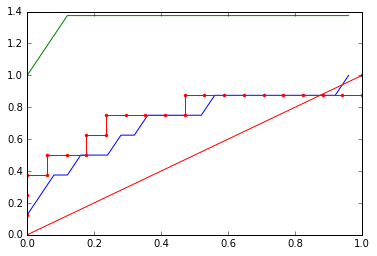

In [30]:
f_denom=None
h_denom=None
FH_m  = calc_molchan_sum(Z_fc, Z_ev, f_denom=f_denom, h_denom=h_denom)
FH_m2 = calc_molchan(Z_fc, Z_ev, f_denom=f_denom, h_denom=h_denom)
FH = rtp.calc_roc(Z_fc, Z_ev, f_denom=f_denom, h_denom=h_denom)

plt.figure()
plt.plot(*zip(*FH_m))
plt.plot(*zip(*FH_m2))
plt.plot(*zip(*FH), marker='.', ls='-')
plt.plot(range(2), range(2), 'r-')